### Tarea 2 Cosmología
### Clemente Miranda

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


### P5
Using CAMB compute the matter power spectrum at different redshift. Then, manually set the density of
massive neutrinos to zero. Comment the differences and justify the results.

In [61]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

Note: redshifts have been re-sorted (earliest first)


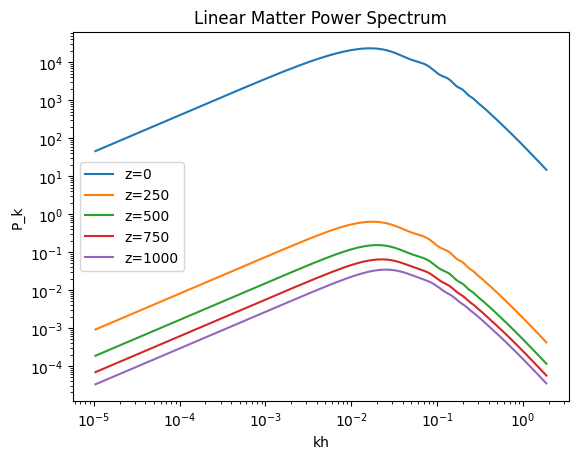

In [65]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

# Podemos cambiar algún parámetro después de fijar el modelo.

pars.set_dark_energy(w=-1);

pars.InitPower.set_params(ns=ns)

redshifts = np.linspace(0,1000, 5)

pars.set_matter_power(redshifts)

results = camb.get_results(pars)

kh, z, Pk = results.get_linear_matter_power_spectrum()

plt.plot(kh, Pk[0], label= "z=0")
plt.plot(kh, Pk[1], label= "z=250")
plt.plot(kh, Pk[2], label= "z=500")
plt.plot(kh, Pk[3], label= "z=750")
plt.plot(kh, Pk[4], label= "z=1000")
plt.legend()
plt.title("Linear Matter Power Spectrum")
plt.xlabel("kh")
plt.ylabel("P_k")
plt.xscale("log")
plt.yscale("log")
plt.show()

Podemos ver que a mayor redshift las perturbaciones son más pequeñas eso es debido a que a medida que pasa el tiempo la materia se va 
acumulando en las perturbaciones y cada vez son más grandes las amplitudes

Ahora ponemos la densidad de neutrinos a cero

Note: redshifts have been re-sorted (earliest first)


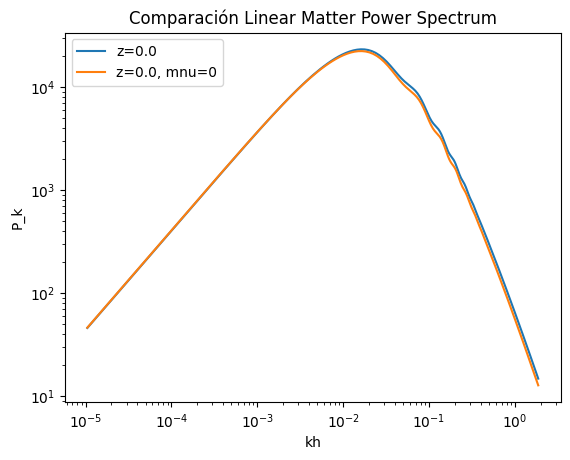

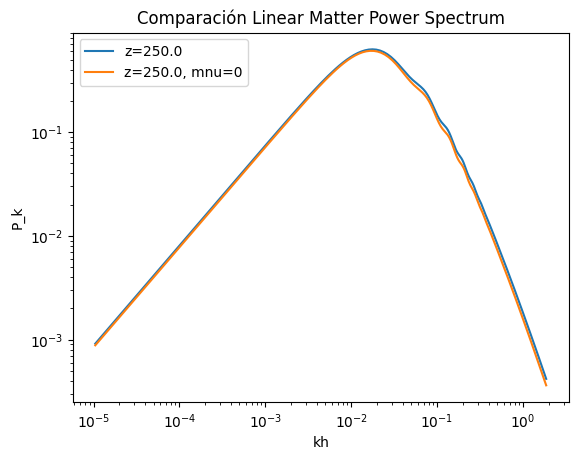

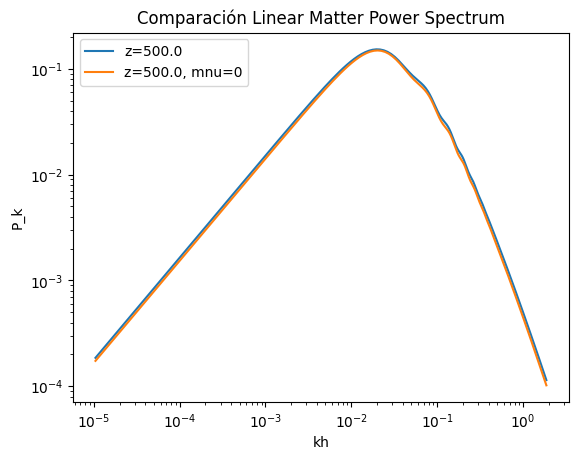

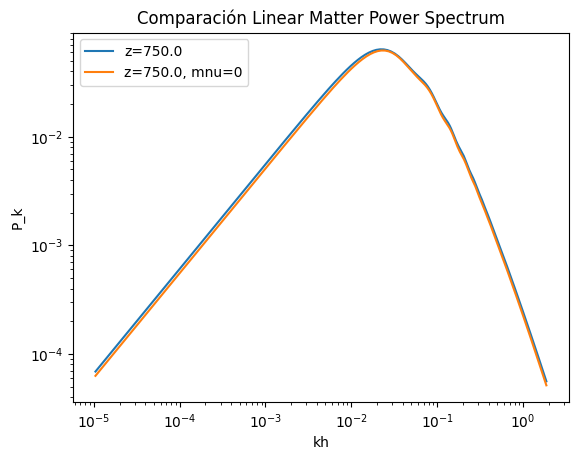

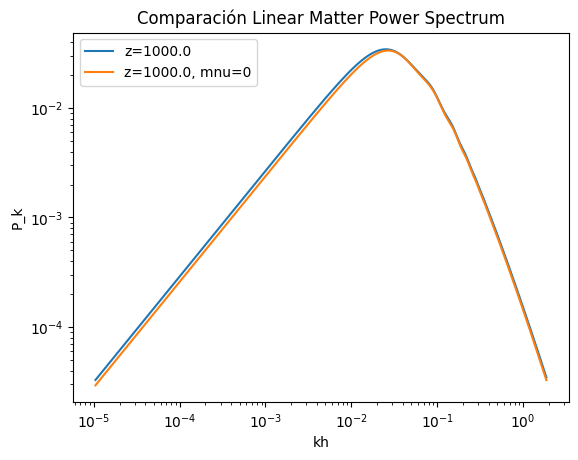

In [64]:
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau, mnu=0)
pars.set_dark_energy(w=-1);
pars.InitPower.set_params(ns=ns)

pars.set_matter_power(redshifts)
results = camb.get_results(pars)

kh0, z, Pk0 = results.get_linear_matter_power_spectrum()
#kh02, z, Pk02 = results.get_nonlinear_matter_power_spectrum()

for i in range(len(redshifts)):
    plt.plot(kh, Pk[i], label= "z="+str(redshifts[i]))
    plt.plot(kh0, Pk0[i], label= "z="+str(redshifts[i])+", mnu=0")
    plt.legend()
    plt.title("Comparación Linear Matter Power Spectrum")
    plt.xlabel("kh")
    plt.ylabel("P_k")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

Al no tener masa los neutrinos estos pierden su efecto de disminuir el crecimiento de estructuras debido a sus altas velocidades, por lo que el power spectrum con neutrinos sin masa es ligeramente menor para algunos k que cuando si éstos tuvieran masa.

### P6 
Using CAMB compute the TT angular power spectrum. Then, explore different cosmological parameters
and explain the differences in the results. Give at least one compelling example and its justification.

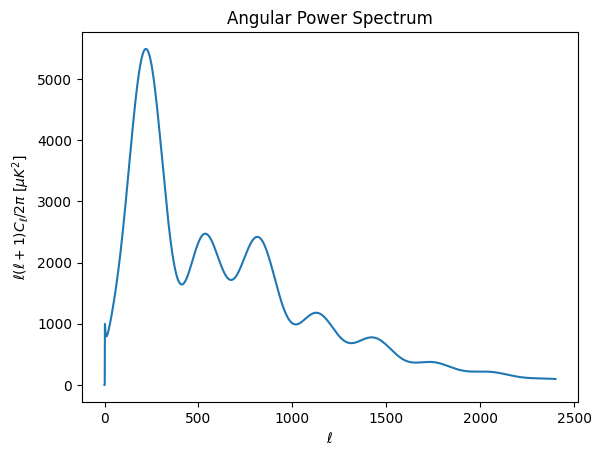

In [72]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

# Podemos cambiar algún parámetro después de fijar el modelo.

pars.set_dark_energy(w=-1);

pars

# Calcula el resultado
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

# Obtén el espectro de temperatura TT
cmb = powers['total']
plt.plot(cmb[:, 0])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$ [$\mu K^2$]')
plt.title('Angular Power Spectrum')
plt.show()


Usamos otros parámetros, como cambiar la densidad de bariones 

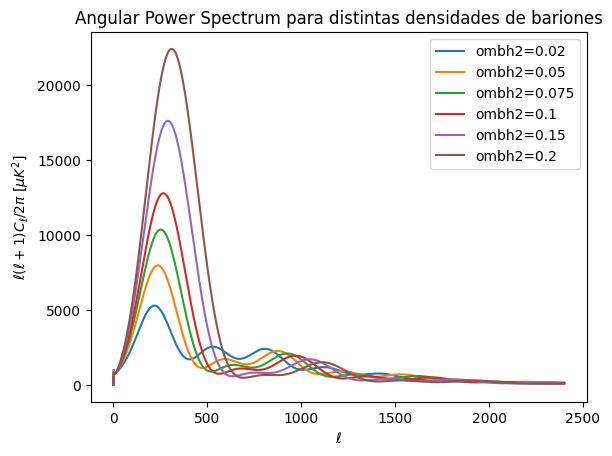

In [73]:
barions = [0.02, 0.05, 0.075, 0.1, 0.15, 0.2]
# Creamos un objeto donde guardaremos los parámetros cosmológicos
powers = [0,0,0,0,0,0]
for i in range(len(barions)):
    pars = camb.CAMBparams()

    pars.set_cosmology(H0=H0, ombh2=barions[i], omch2=omega_ch2, tau=tau)

# Podemos cambiar algún parámetro después de fijar el modelo.

    pars.set_dark_energy(w=-1);


# Calcula el resultado
    results = camb.get_results(pars)
    powers[i] = results.get_cmb_power_spectra(pars, CMB_unit='muK')

# Obtén el espectro de temperatura TT
for i in range(len(powers)):
    cmb = powers[i]['total']
    plt.plot(cmb[:, 0], label="ombh2="+str(barions[i]))
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$ [$\mu K^2$]')
plt.title('Angular Power Spectrum para distintas densidades de bariones')
plt.show()

Cambiando la densidad de bariones vemos que el power spectrum se altera su forma sinusoidal aumentando su pick y moviendo y disimuyendo sus otras oscilaciones, ya que la velocidad del sonido aumenta con la densidad entonces el pick de BAO es mayor y se mueve ligeramente a escalas mas pe, y a mayor densidad de bariones el damping se mueve a escalas angulares más pequeñas.

### P4
Numerically solve the perturbation equations for a matter component with $w = \delta p = \sigma = 0$, where w
is the equation of state parameter, $\delta p$ the pressure perturbation and $\sigma$ the anistropic stress. Assume a
ΛCDM model with $\Omega_{r,0} = 10^{−4}$ and $\Omega_{m,0} = 0.3$. Plot your results for $10^{−4} ≤ a ≤ 1$ and four different
scales: $k = H_0$ , $k = 5H_0$ , $k = 20H_0$ and $k = 200H_0$ . Consider $H_0 = 67 Km/(sMpc)$.

Las ecuacuiones de las perturbaciones son:
$$k^{2}\phi + 3H(H\phi+\dot{\phi})=-4\pi G a^{2} \bar{\rho} \delta$$
$$H\phi + \dot{\phi}=4\pi G a{2} \bar{\rho} \theta$$
$$\phi(H^{2}+2\dot{H}) + 3H\dot{\phi} + \ddot{\phi}=0$$
$$\dot{\delta}=-(\theta - 3\dot{\phi})$$
$$\dot{\theta}=-H\theta+k^{2}\phi$$
Donde los puntos significa derivadas con respecto al tiempo conforme $d\tau = \frac{dt}{a}$ y $ \theta$ es la divergencia de la velocidad espacial de la perturbación que en espacio de fourier es $\theta = kv_x + kv_y + kv_z$ ya que en espacio real $\theta = \nabla_i v^{i}$ y $v_i = \partial_i \delta$ 
\
Con H dado por:
$$H^{2}(t)=H^{2}_0 a^{-3}(\Omega_{r,0}(a^{-1}-1)+1)$$
\
Entonces hay que resolver el sistema donde las variables $G$, $\bar{\rho}$, $k$ son conocidas y se debe resolver el sistema y encontrar las variables desconocidas $\phi$, $\theta$, $\delta$ en función de $a$. Para para valores de $a$: $10^{−4} ≤ a ≤ 1$, y para valores de $k$: $k = H_0$ , $k = 5H_0$ , $k = 20H_0$ and $k = 200H_0$. Y con $\Omega_{r,0} = 10^{−4}$ and $\Omega_{m,0} = 0.3$.

In [50]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constantes cosmológicas y físicas
H0 = 67 * 1e3 / (3.086e22)  # H0 en s^-1 (convertido de km/(s Mpc))
G = 6.67430e-11  # Constante gravitacional en m^3 kg^-1 s^-2
c = 3.0e8  # Velocidad de la luz en m/s

# Parámetros del modelo cosmológico
Omega_r0 = 1e-4
Omega_m0 = 0.3
Omega_Lambda0 = 1 - Omega_r0 - Omega_m0

# Definimos la densidad crítica hoy
rho_crit0 = 3 * H0**2 / (8 * np.pi * G)

# Escalas para k en términos de H0
k_vals = [H0, 5*H0, 20*H0, 200*H0]


In [51]:
# Función para H en función de a
def H(a):
    return H0 * np.sqrt(Omega_r0 * a**-4 + Omega_m0 * a**-3 + Omega_Lambda0)

# Densidad promedio de materia en función de a
def rho_m(a):
    return Omega_m0 * rho_crit0 * a**-3


In [52]:
# Sistema de ecuaciones diferenciales
def perturbation_system(a, y, k):
    phi, dphi_da, delta, theta = y  # Variables y sus derivadas

    # Valores de H y dH/da
    Ha = H(a)
    dH_da = (-0.5 * H0**2 * (4 * Omega_r0 * a**-5 + 3 * Omega_m0 * a**-4) /
             Ha)

    # Ecuaciones diferenciales en función de a
    dphi2_da2 = (-phi * (Ha**2 + 2 * a * Ha * dH_da) - 3 * Ha * a * dphi_da) / (a**2 * Ha**2)
    ddelta_da = -(theta - 3 * a * Ha * dphi_da) / (a * Ha)
    dtheta_da = -theta / a + k**2 * phi / (a * Ha)

    return [dphi_da, dphi2_da2, ddelta_da, dtheta_da]


In [53]:
# Condiciones iniciales
a_init = 1e-4
phi_init = 1e-5
dphi_da_init = 0  # Podemos asumir que la derivada es inicialmente cero
delta_init = 1e-5
theta_init = 0  # Supongamos un valor inicial de cero para la divergencia de velocidad

initial_conditions = [phi_init, dphi_da_init, delta_init, theta_init]


In [55]:
# Rango de a
a_span = (a_init, 1)
a_eval = np.logspace(np.log10(a_init), 0, 100)  # 500 puntos entre 10^-4 y 1

# Soluciones para cada valor de k
solutions = {}
for k in k_vals:
    sol = solve_ivp(
        perturbation_system, a_span, initial_conditions, args=(k,),
        t_eval=a_eval, method='RK45', rtol=1e-5, atol=1e-8
    )
    solutions[k] = sol


KeyboardInterrupt: 

In [ ]:
# Graficar resultados
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
a_values = solutions[k_vals[0]].t  # Usamos el rango de a

for i, k in enumerate(k_vals):
    sol = solutions[k]
    axs[0].plot(a_values, sol.y[2], label=f'k = {k / H0:.0f} H0')  # Delta
    axs[1].plot(a_values, sol.y[3], label=f'k = {k / H0:.0f} H0')  # Theta
    axs[2].plot(a_values, sol.y[0], label=f'k = {k / H0:.0f} H0')  # Phi

# Configuración de los gráficos
axs[0].set_ylabel(r'$\delta(a)$')
axs[1].set_ylabel(r'$\theta(a)$')
axs[2].set_ylabel(r'$\phi(a)$')
axs[2].set_xlabel(r'$a$')
for ax in axs:
    ax.set_xscale('log')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()
